# Name: Nikita Shisodia

## Iris Dataset

<b> The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository</b>

<b> It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other </b>

The columns in this dataset are:
    1. Id
    2. SepalLengthCm
    3. SepalWidthCm
    4. PetalLengthCm
    5. PetalWidthCm
    6. Species

### Task : Predict the optimum number of clusters and represent it visually. 

#### As we can see that the task a Unsupervised Learning Task

## Now lets start with the analysis :

In [166]:
# Importing neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [167]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [168]:
# Chalo's lets load the data
df = pd.read_csv('Iris.csv')
("Imported the dataset")

'Imported the dataset'

In [169]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Check some statistical data 

In [170]:
print(color.BOLD,color.DARKCYAN,"Shape of the Dataset :",df.shape,color.END )

  Shape of the Dataset : (150, 6) 


In [171]:
print(color.BOLD,color.GREEN,"No. of Rows     :",df.shape[0],color.END )
print(color.BOLD,color.GREEN,"No. of Columns  :",df.shape[1],color.END )

  No. of Rows     : 150 
  No. of Columns  : 6 


In [172]:
print("\033[1m Info of the Dataset \033[0m")
df.info()

 Info of the Dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [173]:
# check for null values
print(color.BOLD,color.PURPLE,"Null Value checking :",color.END)
print((df.isnull().sum()/df.shape[0])*100)

  Null Value checking : 
Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64


In [174]:
# Lookin for value counts of Species
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### As we can see that there is no null values in the dataset

In [175]:
print(color.BOLD,color.GREEN,"************* Description of the Dataset: **************",color.END)
df.describe()

  ************* Description of the Dataset: ************** 


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [176]:
# check for the correlation between independent variable
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Let's plot some graphs to get an better understanding

<Figure size 144x144 with 0 Axes>

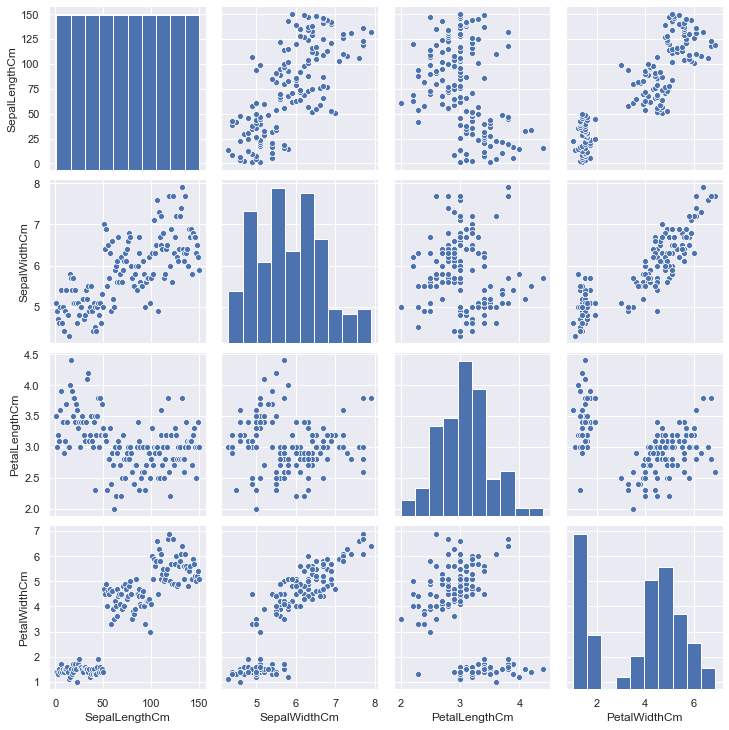

In [177]:
plt.figure(figsize=(2,2))
sns.pairplot(pd.DataFrame(df.iloc[:, [0,1, 2, 3]].values,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']),palette=['brown'])
plt.show()

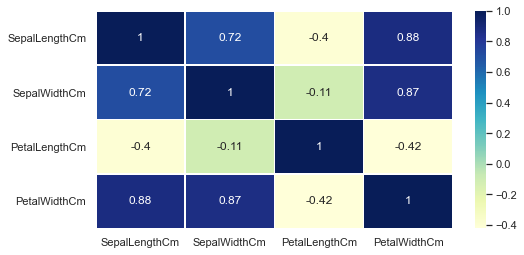

In [178]:
# Plotting heatmap for checking correlation
plt.figure(figsize=(8,4))
sns.heatmap(
            (pd.DataFrame(df.iloc[:, [0,1, 2, 3]].values,
            columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])).corr()
           ,annot=True
           ,linewidths=.5
           ,cmap="YlGnBu")
plt.show()

##### As we can see that the PetalWidthCm is 0.96 correlated with PetalLengthCm


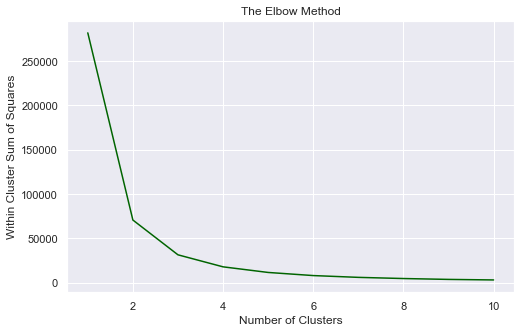

In [179]:
# Finding the optimum number of clusters for k-means classification
sns.set(style='darkgrid',palette='deep',font='sans-serif')
plt.figure(figsize=(8,5))

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
plt.plot(range(1, 11), wcss,color = 'darkgreen')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares') # Within cluster sum of squares
plt.show()

### As we can number of cluster =  3 suits best as fter that WCSS doesn't fall significantly

In [180]:
# Applying kmeans to the dataset / Creating the kmeans classifier

x = df.iloc[:, [0, 1, 2, 3]].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


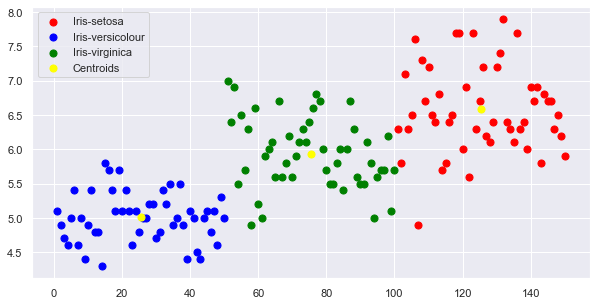

In [181]:
# Visualising the clusters - On the first two columns
sns.set(style='darkgrid',palette='deep',font='sans-serif')
plt.figure(figsize=(10,5))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 50, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 50, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

### In the above graph we can clearly see that each points contains 
    - 50 - Iris-setosa
    - 50 - Iris-versicolour
    - 50 - Iris-virginica


### Let's check for some other value of K, cluster = 4

In [182]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 4, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


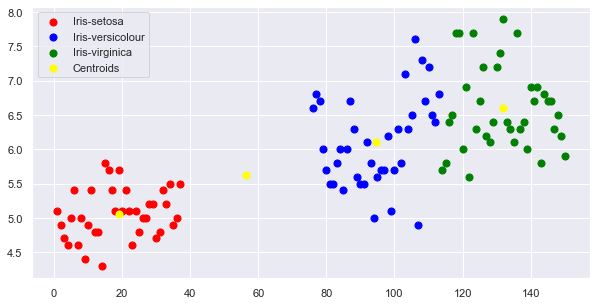

In [183]:
# Visualising the clusters - On the first two columns
sns.set(style='darkgrid',palette='deep',font='sans-serif')
plt.figure(figsize=(10,5))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 50, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 50, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

### Let's check for number of cluster as 2

In [184]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

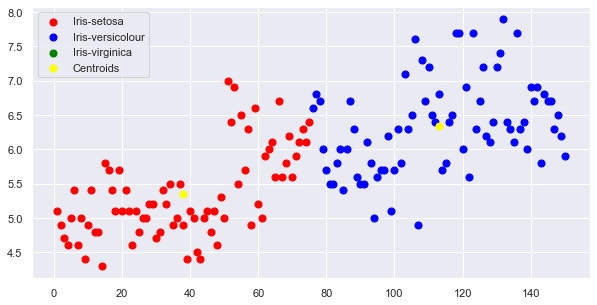

In [185]:
# Visualising the clusters - On the first two columns
sns.set(style='darkgrid',palette='deep',font='sans-serif')
plt.figure(figsize=(10,5))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 50, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 50, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

### As we can clearly see that :
    ******************************************************************
    - Number of cluster = 4 is one cluster remains unassigned 
    - Number of cluster = 3 is perfect match 
    - Number of cluster = 2 then some of the points are misclassified 
    ******************************************************************